In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.svm import SVC

In [7]:
heart_dataset = pd.read_csv("heart.csv")

In [8]:
from PIL import Image
from IPython.display import display


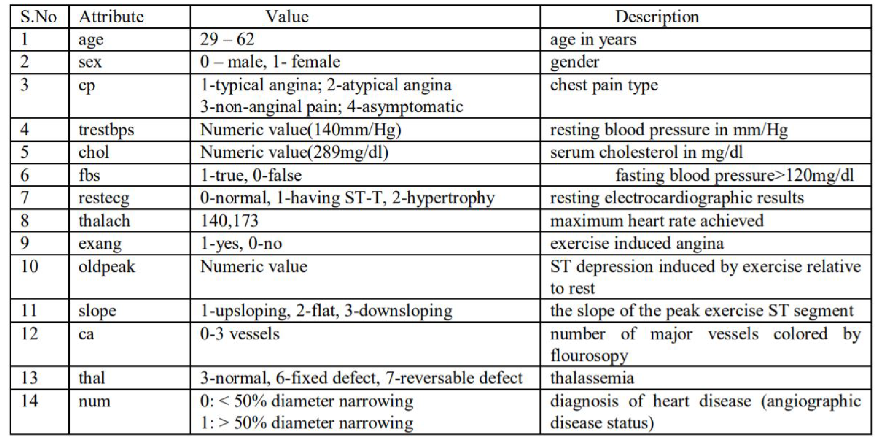

In [9]:
img = Image.open(r"heart_data.png")
img

 Thal Value
 <ul>
     <li> 0: NULL (dropped from the dataset previously.)</li>
     <li> 1: fixed defect (no blood flow in some part of the heart)</li> 
     <li> 2: normal blood flow.</li>
     <li> 3: reversible defect (a blood flow is observed but it is not normal)</li>
 </ul>


In [10]:
print('The Chest Pain Values',heart_dataset['cp'].value_counts())
print('Resting Blood Pressure',heart_dataset['slope'].value_counts())
print('Cholestrol',heart_dataset['chol'].value_counts())
print('Fasting Blood Pressure',heart_dataset['fbs'].value_counts())
print('Thalasemmia value',heart_dataset['thal'].value_counts())
print('Target Value',heart_dataset['target'].value_counts())


The Chest Pain Values cp
0    497
2    284
1    167
3     77
Name: count, dtype: int64
Resting Blood Pressure slope
1    482
2    469
0     74
Name: count, dtype: int64
Cholestrol chol
204    21
234    21
197    19
212    18
254    17
       ..
164     3
394     3
215     3
160     3
141     3
Name: count, Length: 152, dtype: int64
Fasting Blood Pressure fbs
0    872
1    153
Name: count, dtype: int64
Thalasemmia value thal
2    544
3    410
1     64
0      7
Name: count, dtype: int64
Target Value target
1    526
0    499
Name: count, dtype: int64


In [11]:
heart_dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [12]:
heart_dataset.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [13]:
heart_dataset.shape

(1025, 14)

In [14]:
heart_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [15]:
heart_dataset.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [16]:
heart_dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [17]:
heart_dataset['fbs'].corr(heart_dataset['target'])

-0.04116354746465128

Text(0.5, 9.444444444444438, 'Maximum Heart rate Achieved')

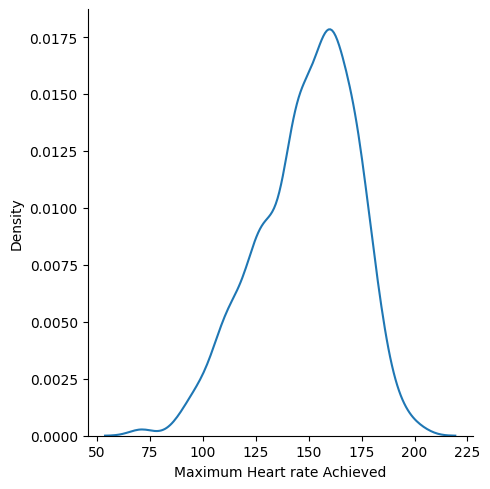

In [18]:
sns.displot(heart_dataset['thalach'] , kind='kde')
plt.xlabel('Maximum Heart rate Achieved')

<Axes: xlabel='fbs', ylabel='target'>

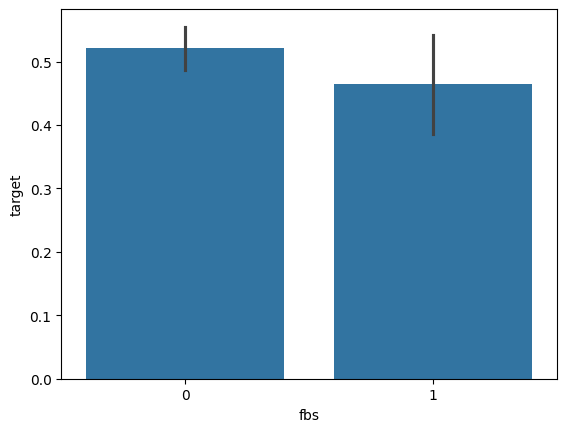

In [19]:
sns.barplot(heart_dataset , x = 'fbs' , y = 'target')

<Axes: xlabel='sex', ylabel='count'>

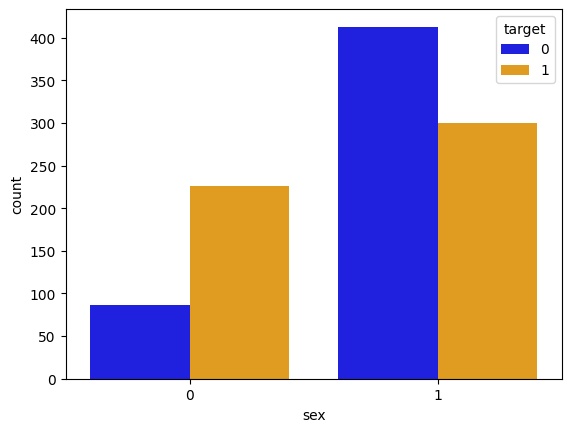

In [20]:
sns.countplot(data = heart_dataset , x='sex' , hue = 'target' , palette = ['blue','orange'])

In [21]:
X = heart_dataset.drop(columns = 'target', axis = 1)
Y = heart_dataset['target']

In [22]:
print(X)

      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  
0         2   2     3  
1         0   0     3  
2  

In [23]:
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64


In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 3, stratify = Y)

In [25]:
print(X.shape, X_train.shape, X_test.shape)

(1025, 13) (820, 13) (205, 13)


In [26]:
scalar = StandardScaler()

In [27]:
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

In [28]:
X_train

array([[ 1.63103803, -1.50996689,  1.96821903, ...,  1.01005128,
         1.21850894, -0.52277811],
       [ 1.63103803,  0.66226618,  1.96821903, ..., -0.60131457,
         0.24274983, -0.52277811],
       [-0.90828649,  0.66226618,  0.04342523, ...,  1.01005128,
        -0.73300929,  1.10717646],
       ...,
       [ 1.52063262,  0.66226618,  1.00582213, ...,  1.01005128,
         0.24274983,  1.10717646],
       [ 0.74779472,  0.66226618, -0.91897168, ...,  1.01005128,
         0.24274983,  1.10717646],
       [ 0.96860555,  0.66226618, -0.91897168, ..., -0.60131457,
         0.24274983,  1.10717646]])

In [29]:
logmodel = LogisticRegression()

In [30]:
logmodel.fit(X_train, Y_train)

LogisticRegression()

In [31]:
X_train_pred = logmodel.predict(X_train)
training_data_accuracy = accuracy_score( Y_train , X_train_pred)

In [32]:
print("Accuracy on Training Data: ", training_data_accuracy)

Accuracy on Training Data:  0.8609756097560975


In [33]:
X_test_pred = logmodel.predict(X_test)
test_data_accuracy = accuracy_score(Y_test , X_test_pred)

In [34]:
print("Accuracy on Test Data: ", test_data_accuracy)

Accuracy on Test Data:  0.8439024390243902


In [35]:
from sklearn.svm import SVC

svmmodel = SVC(kernel='linear')


In [36]:
svmmodel.fit(X_train , Y_train)

SVC(kernel='linear')

In [37]:
X_prediction = svmmodel.predict(X_train)
trainingdata_acc = accuracy_score(X_prediction , Y_train)
trainingdata_acc

0.8451219512195122

In [38]:
Xtest_prediction = svmmodel.predict(X_test)
test_acc = accuracy_score(Xtest_prediction , Y_test)
test_acc

0.824390243902439

From this we can Understood that Our Model 1 is better than Model2 

In [39]:
from sklearn.model_selection import cross_val_score

In [40]:
score1 = cross_val_score(logmodel , X_train , Y_train , cv = 6 , n_jobs=-1)
score2 = cross_val_score(svmmodel , X_train , Y_train  , cv = 6 , n_jobs=-1)

In [41]:
score1.mean()

0.8390314154859023

In [42]:
score2.mean()

0.8365804350937456

Hence we also prove With k-fold cross validation that Model1 is better than model2

In [43]:
from sklearn.metrics import precision_score,recall_score , f1_score, r2_score, log_loss

chart = {
        'Metric':["F1-Score", "Recall", "Precision", "R2-Score"],
        'Logistic Regression':[f1_score(Y_test, X_test_pred), recall_score(Y_test, X_test_pred), precision_score(Y_test, X_test_pred), r2_score(Y_test, X_test_pred)]
}
chart = pd.DataFrame(chart)

In [44]:
chart

,Metric,Logistic Regression
0,F1-Score,0.851852
1,Recall,0.876190
2,Precision,0.828829
3,R2-Score,0.375238


In [45]:
print("Classification Report:")
print(classification_report(Y_test, X_test_pred))
print("Confusion Matrix:")
conf_matrix = confusion_matrix(Y_test, X_test_pred)
print(conf_matrix)

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.81      0.84       100
           1       0.83      0.88      0.85       105

    accuracy                           0.84       205
   macro avg       0.85      0.84      0.84       205
weighted avg       0.84      0.84      0.84       205

Confusion Matrix:
[[81 19]
 [13 92]]


In [46]:
tn, fp, fn, tp = conf_matrix.ravel()
print("True Negatives:", tn)
print("False Positives:", fp)
print("False Negatives:", fn)
print("True Positives:", tp)

True Negatives: 81
False Positives: 19
False Negatives: 13
True Positives: 92


In [47]:
heart_dataset.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [48]:
coefficients = logmodel.coef_[0]

# Create a DataFrame to display feature coefficients
feature_coefficients = pd.DataFrame({'Feature': ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'], 'Coefficient': coefficients})

# Sort the DataFrame by absolute coefficient values to identify the most influential features
feature_coefficients['Abs_Coefficient'] = feature_coefficients['Coefficient'].abs()
feature_coefficients = feature_coefficients.sort_values(by='Abs_Coefficient', ascending=False)

# Display the top 2-3 most important features
print("Top most important features:")
print(feature_coefficients.head())


Top most important features:
    Feature  Coefficient  Abs_Coefficient
2        cp     0.944367         0.944367
1       sex    -0.885519         0.885519
11       ca    -0.800486         0.800486
9   oldpeak    -0.767793         0.767793
7   thalach     0.498797         0.498797


In [49]:
# 'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
#        'exang', 'oldpeak', 'slope', 'ca', 'thal',
#input_values = (44,1,2,130,233,0,1,179,1,0.4,2,0,2)
input = (70,1,2,160,269,0,1,112,1,2.9,1,1,3)

input_data_as_numpy_array = np.asarray(input)
newdata = input_data_as_numpy_array.reshape(1, -1)


stand_data = scalar.transform(newdata)
prediction = logmodel.predict(newdata)
print(prediction)

# Assuming top_features is a DataFrame containing the top features
top_features = feature_coefficients['Feature'].head(3)

# Extract the corresponding values from the input_data array
top_feature_values = input_data_as_numpy_array[list(top_features.index)]

# Display the top 3 features and their values when the prediction is non-diabetic
if prediction == 0:
    print("This Person's Heart is Good.")
    print("Top 3 features contributing to Heart prediction:")
    for i in range(len(top_features)):
        feature = top_features.iloc[i]
        value = top_feature_values[i]
        print(f"{feature}: {value}")
else:
    print("Person is having Heart Disease.")
    print("Top 3 features contributing to Heart prediction:")
    for i in range(len(top_features)):
        feature = top_features.iloc[i]
        value = top_feature_values[i]
        print(f"{feature}: {value}")



[0]
This Person's Heart is Good.
Top 3 features contributing to Heart prediction:
cp: 2.0
sex: 1.0
ca: 1.0


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [50]:
import pickle

In [51]:
model_filename = 'Heart_trained_model.sav'
pickle.dump(logmodel, open(model_filename, 'wb'))

# Save the scalar used for standardization
scalar_filename = 'Heart_scalar.sav'
pickle.dump(scalar, open(scalar_filename, 'wb'))


In [52]:
# Load the trained model
Heart_model = pickle.load(open('Heart_trained_model.sav', 'rb'))

# Load the scalar used for standardization
Heart_scalar = pickle.load(open('Heart_scalar.sav', 'rb'))



In [53]:
#input_values = (44,1,2,130,233,0,1,179,1,0.4,2,0,2)
input = (70,1,2,160,269,0,1,112,1,2.9,1,1,3)

input_data_as_numpy_array = np.asarray(input)
newdata = input_data_as_numpy_array.reshape(1, -1)


stand_data = Heart_scalar.transform(newdata)
prediction = Heart_model.predict(stand_data)
print(prediction)

# Assuming top_features is a DataFrame containing the top features
top_features = feature_coefficients['Feature'].head(3)

# Extract the corresponding values from the input_data array
top_feature_values = input_data_as_numpy_array[list(top_features.index)]

# Display the top 3 features and their values when the prediction is non-diabetic
if prediction == 0:
    print("This Person's Heart is Good.")
    print("Top 3 features contributing to Heart prediction:")
    for i in range(len(top_features)):
        feature = top_features.iloc[i]
        value = top_feature_values[i]
        print(f"{feature}: {value}")
else:
    print("Person is having Heart Disease.")
    print("Top 3 features contributing to Heart prediction:")
    for i in range(len(top_features)):
        feature = top_features.iloc[i]
        value = top_feature_values[i]
        print(f"{feature}: {value}")



[0]
This Person's Heart is Good.
Top 3 features contributing to Heart prediction:
cp: 2.0
sex: 1.0
ca: 1.0


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
